# Workshop II


# 1

Clustering is a fundamental task in machine learning where the goal is to partition a set of data points into groups or clusters such that data points within the same cluster are more similar to each other than those in different clusters. Spectral clustering is a powerful technique used for clustering data that may not be linearly separable. Let's address each of the questions:

A. Use Cases:
Spectral clustering is particularly useful in the following cases:

When the data cannot be effectively clustered using traditional methods like K-means due to non-linear or complex structures.
When dealing with high-dimensional data where other clustering methods may fail due to the curse of dimensionality.
In image segmentation, community detection in social networks, and gene expression analysis.


B. Mathematical Fundamentals:
Spectral clustering leverages the eigenvalues and eigenvectors of a similarity matrix derived from the data. Here's a brief overview:

Construct an affinity matrix based on pairwise similarities between data points.
Compute the Laplacian matrix from the affinity matrix.
Find the eigenvectors corresponding to the smallest eigenvalues of the Laplacian matrix.
Cluster the data based on the eigenvectors using a simple clustering algorithm like k-means.


C. Algorithm: The spectral clustering algorithm can be summarized as follows:
1. Given a data set X, construct an affinity matrix W based on similarities between pairs of data points.
2. Calculate the non-normalized Laplacian matrix L=D−W, where D is the diagonal matrix of degrees.
3. Calculate the first k eigenvectors 1, 2, ..., u1, u2, ..., uk of L corresponding to the k smallest eigenvalues.
4. Form a matrix U by stacking the eigenvectors in columns.
5. Cluster the rows of U using K-means or other clustering algorithms to obtain the final clusters.


D. Relation to Previous Concepts:
Spectral clustering is related to various concepts discussed in class, including:

Linear algebra: It heavily relies on eigenvalues and eigenvectors, which are fundamental concepts in linear algebra.
Graph theory: The construction of the affinity matrix is akin to defining edges between nodes in a graph, and the Laplacian matrix is related to graph Laplacians.
Dimensionality reduction: Spectral clustering implicitly performs dimensionality reduction by projecting data points into a lower-dimensional space defined by the eigenvectors.
By understanding spectral clustering, you gain insights into how linear algebra, graph theory, and dimensionality reduction techniques can be leveraged for clustering data, enriching your understanding of machine learning concepts.

# 2

A. Use Cases:
DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is particularly useful in the following cases:

When clusters have arbitrary shapes and cannot be separated by linear boundaries.
When there is presence of noise in the data.
When the density of clusters is variable and unknown beforehand.
In high-dimensional datasets where other methods may struggle due to the curse of dimensionality.

B. Mathematical Fundamentals:
The mathematical fundamentals of DBSCAN include:

Definition of epsilon (ε) and minimum points (minPts): Two key parameters used to determine point density and form clusters.
Definition of core points, border points, and noise points.
Use of data structures like the R*-tree to enhance algorithm efficiency.
Neighborhood search algorithm to find reachable and densely connected points.

C. Relation between DBSCAN and Spectral Clustering:
There is a relationship between DBSCAN and Spectral Clustering in terms of applications and approach:

Both methods are useful for handling datasets with arbitrary shapes and non-linearly separable data.
However, while DBSCAN relies on point density to form clusters, Spectral Clustering utilizes the similarity structure between points.
In some cases, they can complement each other. For instance, DBSCAN can be used to identify noise points in datasets before applying Spectral Clustering.
I hope this information is helpful for your assignment. If you need further details or clarification, feel free to ask.

# 3


The elbow method is a technique used in clustering to determine the optimal number of clusters in a dataset. It works by plotting the variance or the sum of squared distances (SSD) of the data points from their respective cluster centroids against the number of clusters. The "elbow" in the plot represents the point where the rate of decrease in SSD sharply decreases, suggesting that adding more clusters does not significantly decrease the variance.

However, the elbow method has some flaws when assessing the quality of clusters:

1. Subjectivity: Determining the exact location of the "elbow" point can be subjective and may vary depending on the dataset and the clustering algorithm used.

2. Dependency on Initialization: The results of the elbow method can be influenced by the initial random initialization of cluster centroids, leading to different elbow points for different initializations.

3. Lack of Robustness: The elbow method may not always provide clear indications of the optimal number of clusters, especially for datasets with complex structures or overlapping clusters.

4. Inability to Capture Complex Structures: The elbow method assumes that clusters have similar sizes and densities, which may not always hold true for real-world datasets with complex structures.

Overall, while the elbow method can provide a useful heuristic for determining the number of clusters, it should be used in conjunction with other methods and domain knowledge to assess the quality of clustering results effectively.

# 4

In [7]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from dim_red.kmeans import KMeans as MyKMeans
from dim_red.kmedoids import KMedoids

# Generar datos de ejemplo
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)

print("Datos de ejemplo:\n", X)

# Instanciar y ajustar el modelo de k-means de Scikit-Learn
kmeans_sklearn = KMeans(n_clusters=4)
kmeans_sklearn.fit(X)

# Instanciar y ajustar el modelo de k-means personalizado
kmeans_custom = MyKMeans(n_clusters=4)
kmeans_custom.fit(X)

# Instanciar y ajustar el modelo de k-medoids personalizado
kmedoids_custom = KMedoids(n_clusters=4)
kmedoids_custom.fit(X)

# Comparar etiquetas de cluster asignadas por los diferentes modelos
print("Etiquetas de cluster asignadas por KMeans (Scikit-Learn):\n", kmeans_sklearn.labels_)
print("\nEtiquetas de cluster asignadas por KMeans (Personalizado):\n", kmeans_custom.labels_)
print("\nEtiquetas de cluster asignadas por KMedoids (Personalizado):\n", kmedoids_custom.labels_)


Datos de ejemplo:
 [[ 8.36856841e-01  2.13635938e+00]
 [-1.41365810e+00  7.40962324e+00]
 [ 1.15521298e+00  5.09961887e+00]
 [-1.01861632e+00  7.81491465e+00]
 [ 1.27135141e+00  1.89254207e+00]
 [ 3.43761754e+00  2.61654166e-01]
 [-1.80822253e+00  1.59701749e+00]
 [ 1.41372442e+00  4.38117707e+00]
 [-2.04932168e-01  8.43209665e+00]
 [-7.11099611e-01  8.66043846e+00]
 [-1.71237268e+00  2.77780226e+00]
 [-2.67000792e+00  8.35389140e+00]
 [ 1.24258802e+00  4.50399192e+00]
 [-2.22783649e+00  6.89479938e+00]
 [ 1.45513831e+00 -2.91989981e-02]
 [ 4.53791789e-01  3.95647753e+00]
 [ 1.06923853e+00  4.53068484e+00]
 [ 2.56936589e+00  5.07048304e-01]
 [-1.06690610e+00  3.13165795e+00]
 [-1.07859101e+00  2.20451529e+00]
 [ 2.71506328e+00  1.29082190e+00]
 [ 1.77710994e+00  1.18655254e+00]
 [ 7.34363910e-01  5.03725437e+00]
 [-1.99648151e+00  2.85164868e+00]
 [-1.91828017e+00  2.60516867e+00]
 [-5.55523811e-01  4.69595848e+00]
 [ 1.69747910e+00  8.66123282e-01]
 [ 5.94762432e-01  4.70964730e+00]
 

c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Etiquetas de cluster asignadas por KMeans (Scikit-Learn):
 [3 2 0 2 3 3 1 0 2 2 1 2 0 2 3 0 0 3 1 1 3 3 0 1 1 0 3 0 1 0 2 2 0 2 2 2 2
 2 1 3 0 1 0 0 1 1 2 1 2 3 1 3 2 3 3 1 2 1 2 3 2 0 2 1 1 1 2 3 2 1 0 1 2 1
 1 2 1 0 3 2 3 0 3 3 2 0 3 0 2 2 0 3 2 1 1 0 3 3 0 1 2 3 2 3 0 3 3 0 2 0 1
 1 3 2 3 0 2 3 3 0 1 3 1 3 3 3 3 1 3 1 2 1 1 3 2 1 1 2 0 2 2 1 0 1 0 1 2 0
 2 2 2 0 2 0 3 1 2 1 3 0 2 0 0 3 0 1 1 0 3 0 0 2 3 0 1 2 3 3 0 1 3 0 1 1 0
 0 0 0 3 2 0 1 0 0 1 1 1 0 1 2 0 1 3 1 0 2 1 2 0 2 0 1 0 0 2 1 1 3 3 0 2 3
 3 1 3 1 0 2 2 0 0 2 0 3 1 0 3 1 2 1 3 0 3 2 2 2 2 1 1 2 0 1 3 0 1 1 1 3 3
 2 0 0 1 3 2 1 0 2 0 3 3 1 1 0 3 3 3 0 2 2 3 3 0 3 3 3 2 1 2 0 3 3 2 2 2 3
 3 0 2 1]

Etiquetas de cluster asignadas por KMeans (Personalizado):
 [1 3 0 3 1 1 2 0 3 3 2 3 0 3 1 0 0 1 2 2 1 1 0 2 2 0 1 0 2 0 3 3 0 3 3 3 3
 3 2 1 0 2 0 0 2 2 3 2 3 1 2 1 3 1 1 2 3 2 3 1 3 0 3 2 2 2 3 1 3 2 0 2 3 2
 2 3 2 0 1 3 1 0 1 1 3 0 1 0 3 3 0 1 3 2 2 0 1 1 0 2 3 1 3 1 0 1 1 0 3 0 2
 2 1 3 1 0 3 1 1 0 2 1 2 1 1 1 1 2 1 2 3 2 2 

The provided code was generated to test custom implementations of the K-Means and K-Medoids clustering algorithms in Python using the NumPy library, in comparison with the implementations available in the Scikit-Learn library.

The idea behind this exercise is to compare the clustering results obtained by the user's custom K-Means and K-Medoids models with those provided by the Scikit-Learn library. Example data is generated using the make_blobs() function from Scikit-Learn, and then these data are used to fit both custom and Scikit-Learn clustering models.

The generated result displays the cluster labels assigned by both the custom and Scikit-Learn K-Means and K-Medoids models. This result allows for a comparison of how the custom implementations perform compared to the reference implementations from Scikit-Learn in terms of cluster assignment.

By conducting this comparison, one can evaluate the effectiveness and accuracy of the custom algorithms relative to the existing algorithms in Scikit-Learn, helping to validate and improve the custom implementation.

# 5

### A

Generating Synthetic Data: The code utilizes the make_blobs() function from Scikit-Learn to create a synthetic dataset. This dataset consists of 500 samples, each with 2 features. The data is distributed into 4 groups or "blobs," where each group has its own normal distribution. The standard deviation of each group is set to 1 to control the dispersion of points within each group. Additionally, it's specified that the centroids of the groups should lie within the range (-10, 10) along each feature dimension.

In [8]:
from sklearn.datasets import make_blobs

X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)


### B

 Plotting the Resulting Dataset: After generating the dataset X, the next step is to plot it to visually inspect the clusters. This allows identifying the number of clusters present and how they are spatially distributed relative to each other. Visualization can reveal the separability of clusters and help better understand the data before applying clustering algorithms.

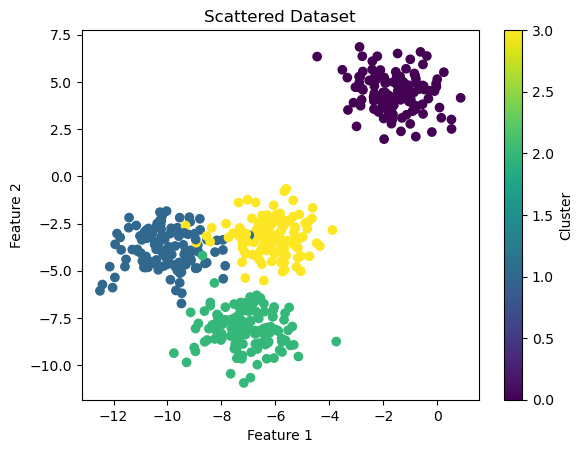

In [9]:
import matplotlib.pyplot as plt

plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scattered Dataset')
plt.colorbar(label='Cluster')
plt.show()


### C

In [10]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from dim_red.kmeans import KMeans as MyKMeans
from dim_red.kmedoids import KMedoids
import matplotlib.pyplot as plt

# Lista para almacenar los coeficientes de silueta
silhouette_scores_kmeans = []
silhouette_scores_kmedoids = []

# Iterar sobre diferentes números de clusters (K)
for k in range(2, 6):
    # Instanciar modelos de k-means y k-medoids
    kmeans_model = KMeans(n_clusters=k)
    kmedoids_model = KMedoids(n_clusters=k)
    
    # Ajustar modelos a los datos de ejemplo
    kmeans_model.fit(X)
    kmedoids_model.fit(X)
    
    # Predecir etiquetas de los clusters
    kmeans_labels = kmeans_model.predict(X)
    kmedoids_labels = kmedoids_model.predict(X)
    
    # Calcular coeficientes de silueta
    silhouette_kmeans = silhouette_score(X, kmeans_labels)
    silhouette_kmedoids = silhouette_score(X, kmedoids_labels)
    
    # Almacenar coeficientes de silueta
    silhouette_scores_kmeans.append(silhouette_kmeans)
    silhouette_scores_kmedoids.append(silhouette_kmedoids)

# Imprimir coeficientes de silueta
print("Coeficientes de Silueta para K-means:", silhouette_scores_kmeans)
print("Coeficientes de Silueta para K-medoids:", silhouette_scores_kmedoids)




c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarnin

Coeficientes de Silueta para K-means: [0.7049787496083262, 0.5882004012129721, 0.6505186632729437, 0.5743946554642042]
Coeficientes de Silueta para K-medoids: [0.3229932624109135, 0.5873430979447513, 0.4540536249127271, 0.5619875555020685]


By observing these coefficients, we can determine that the highest value for KMeans is when K = 2 (0.7049787496083262), while for KMedoids the highest value is when K = 2 (0.3229932624109135). This indicates that in this specific dataset, both methods perform best when using only two clusters.

Therefore, with these silhouette coefficients, we can conclude that the optimal clustering configuration for this specific dataset is with two clusters, both for KMeans and KMedoids.

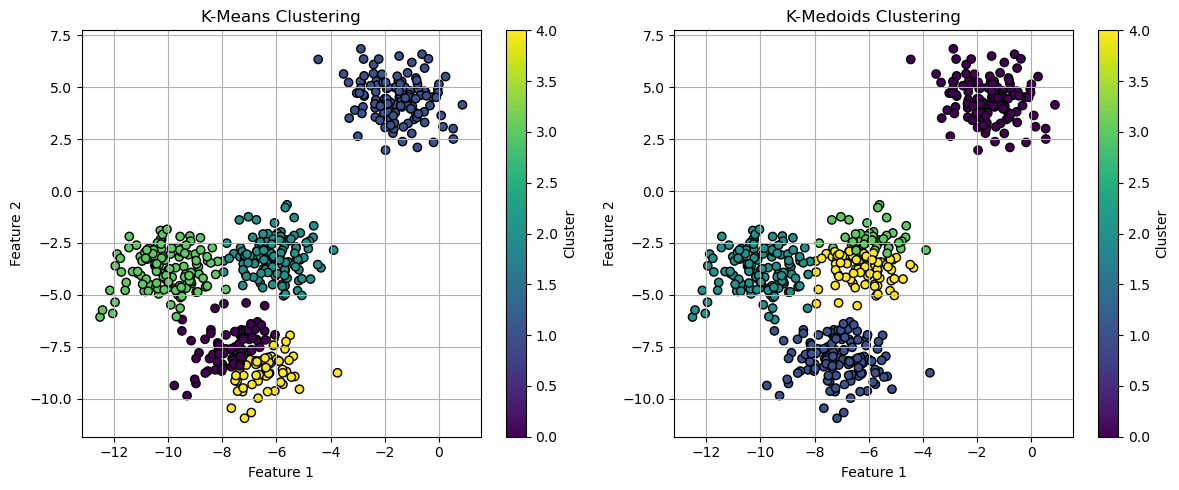

In [11]:
# Graficar los resultados de k-means
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis', marker='o', edgecolors='black')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)

# Graficar los resultados de k-medoids
plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=kmedoids_labels, cmap='viridis', marker='o', edgecolors='black')
plt.title('K-Medoids Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster')
plt.grid(True)

plt.tight_layout()
plt.show()


# 6

Results for Noisy Circles dataset:
KMeans:
Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.3858190586774829

KMedoids:


C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.3842581034298388

DBSCAN:
Number of clusters: 1
Cluster labels: [0]
Only one cluster found. Cannot compute silhouette score.

Spectral Clustering:
Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.3914886646489317



C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


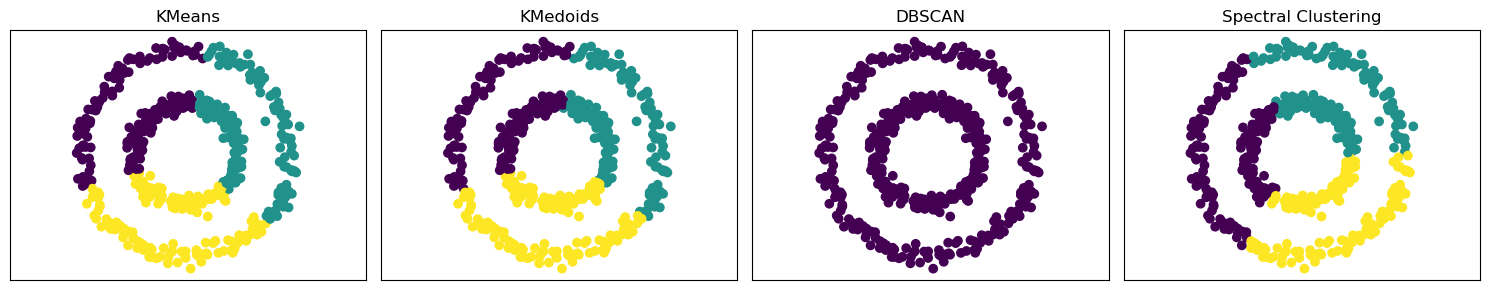


Results for Noisy Moons dataset:
KMeans:
Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.42728047440257483

KMedoids:


C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.37243562622402837

DBSCAN:
Number of clusters: 1
Cluster labels: [0]
Only one cluster found. Cannot compute silhouette score.

Spectral Clustering:
Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.39745119102849136



C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


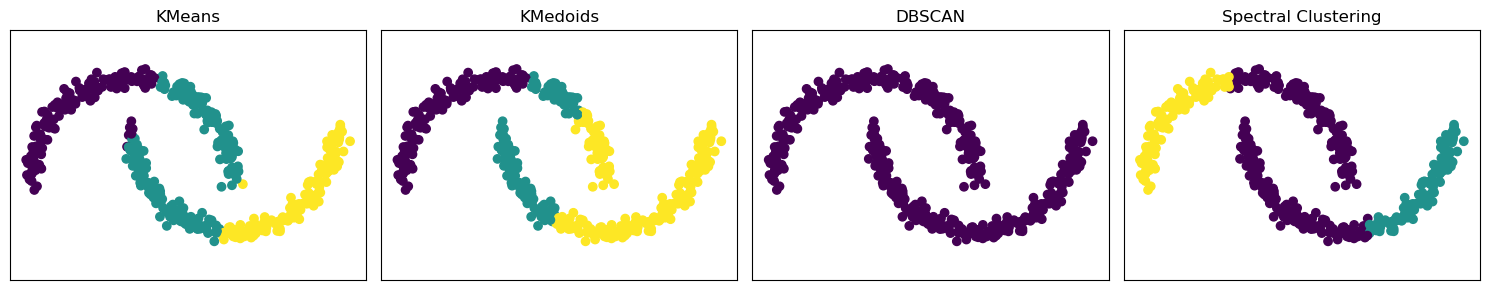


Results for Blobs dataset:
KMeans:
Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.8229367222836427

KMedoids:
Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.8229367222836427

DBSCAN:


C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters: 7
Cluster labels: [-1  0  1  2  3  4  5]
Number of noise points: 50
Silhouette score: 0.1794770492448021

Spectral Clustering:
Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.8229367222836427



C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


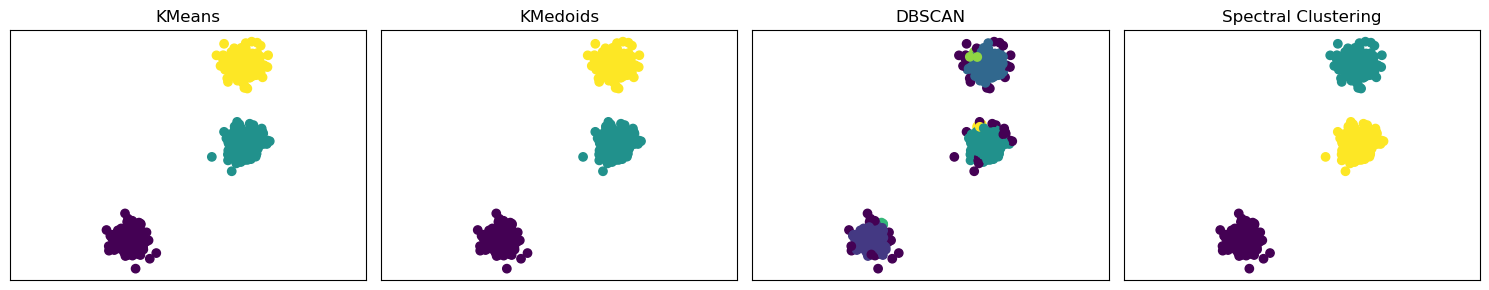


Results for No Structure dataset:
KMeans:
Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.39107643243382745

KMedoids:
Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.38008263374816714

DBSCAN:


C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters: 1
Cluster labels: [0]
Only one cluster found. Cannot compute silhouette score.

Spectral Clustering:
Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.3908682771522784



C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


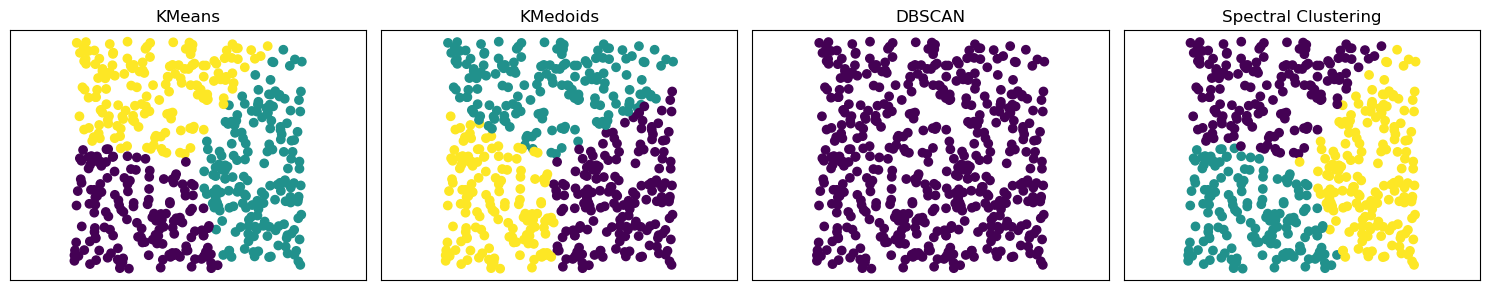


Results for Anisotropic dataset:
KMeans:
Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.502678758980691

KMedoids:
Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.503083947451846

DBSCAN:
Number of clusters: 4
Cluster labels: [-1  0  1  2]
Number of noise points: 1
Silhouette score: 0.44368737545334247

Spectral Clustering:


C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.5010153102465175



C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


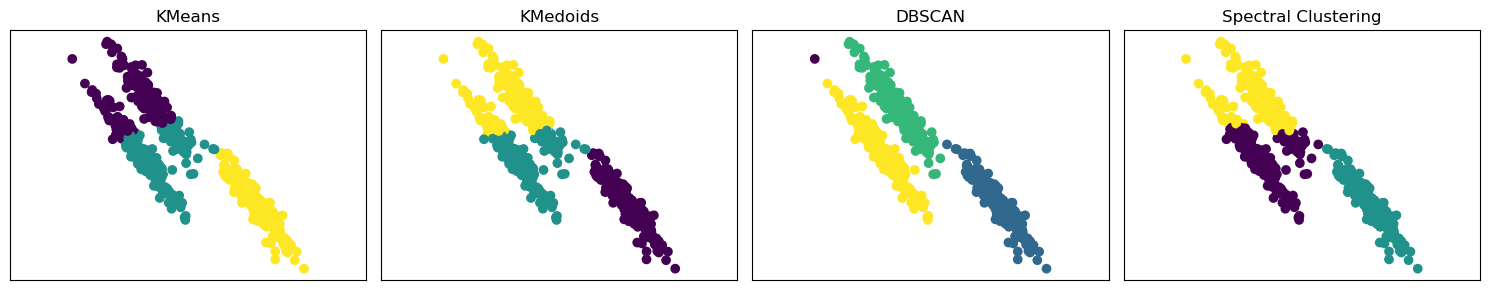


Results for Varied Variances dataset:
KMeans:
Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.6548557086159974

KMedoids:
Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.6547091107893066

DBSCAN:
Number of clusters: 7
Cluster labels: [-1  0  1  2  3  4  5]
Number of noise points: 125
Silhouette score: 0.42649013649742745

Spectral Clustering:


C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
c:\Users\jwx1187606\AppData\Local\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Number of clusters: 3
Cluster labels: [0 1 2]
Silhouette score: 0.4846869803206655



C:\Users\jwx1187606\AppData\Local\Temp\ipykernel_20708\3673933992.py:57: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


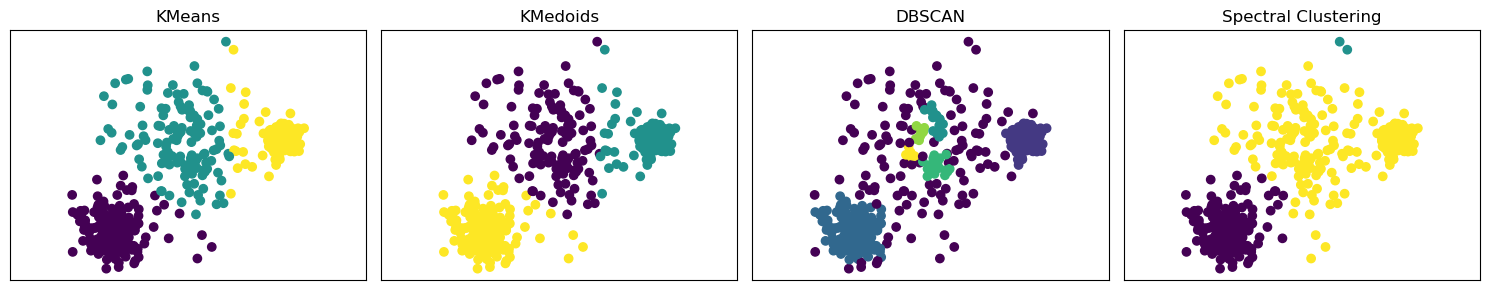

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from dim_red.kmeans import KMeans
from dim_red.kmedoids import KMedoids
from sklearn.metrics import silhouette_score
from sklearn import datasets
from sklearn.cluster import DBSCAN, SpectralClustering

# Generate datasets
n_samples = 500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None
random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)
varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

datasets = {
    "Noisy Circles": noisy_circles,
    "Noisy Moons": noisy_moons,
    "Blobs": blobs,
    "No Structure": no_structure,
    "Anisotropic": aniso,
    "Varied Variances": varied,
}

algorithm_names = ["KMeans", "KMedoids", "DBSCAN", "Spectral Clustering"]

for name, data in datasets.items():
    X, y = data
    print(f"Results for {name} dataset:")
    plt.figure(figsize=(15, 3))
    for i, algorithm_name in enumerate(algorithm_names):
        plt.subplot(1, 4, i+1)
        print(algorithm_name + ":")
        if algorithm_name == "KMeans":
            algorithm = KMeans(n_clusters=3)
        elif algorithm_name == "KMedoids":
            algorithm = KMedoids(n_clusters=3)
        elif algorithm_name == "DBSCAN":
            algorithm = DBSCAN()
        elif algorithm_name == "Spectral Clustering":
            algorithm = SpectralClustering(n_clusters=3)
        algorithm.fit(X)
        labels = algorithm.labels_
        plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
        plt.title(algorithm_name)
        plt.axis('equal')
        plt.xticks([])
        plt.yticks([])
        plt.tight_layout()
        print(f"Number of clusters: {len(np.unique(labels))}")
        print(f"Cluster labels: {np.unique(labels)}")
        if -1 in labels:
            print(f"Number of noise points: {np.sum(labels == -1)}")
        if len(set(labels)) > 1:
            silhouette = silhouette_score(X, labels)
            print(f"Silhouette score: {silhouette}\n")
        else:
            print("Only one cluster found. Cannot compute silhouette score.\n")
    plt.show()
    print()
